<a href="https://colab.research.google.com/github/paton838/works/blob/master/data-science/titanic/titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Source: https://www.kaggle.com/c/titanic

In [0]:
import pandas as pd
import numpy as np
import re as re
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# read in the data
train = pd.read_csv("./train.csv")

In [0]:
# get the dataset for analysis
df = train

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
# There are a lot of missing data in the Cabin column. It suggests that using Cabin to do prediction may not be very reliable.

In [276]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [277]:
# Let's add a Companion column to df to indicate if the person has a companion
df['Companion'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Companion
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [278]:
df[['Companion', 'Survived']].groupby(['Companion']).agg(['mean', 'count'])

# Most of the people in the subset of data are recorded alone (537 people), and
  # the people who have a companion has a significantly higher chance to survive (55%) than the lone people (30%).
# This table also indicates that the people who have the highest survival chances (72%) have a family size of 3, which is a medium size family

# This result suggests that Companion would be a useful feature for predictions.

Survived      
               mean count
Companion                
0          0.303538   537
1          0.552795   161
2          0.578431   102
3          0.724138    29
4          0.200000    15
5          0.136364    22
6          0.333333    12
7          0.000000     6
10         0.000000     7

In [279]:
# Let's check out the Ticket Class vs Survival Rate
df[['Pclass', 'Survived']].groupby(['Pclass']).agg(['mean', 'count'])
# This result suggests that higher the Ticket Class, the survival rate is much higher.

# This result suggests that Pclass would be a useful feature for predictions.

Survived      
            mean count
Pclass                
1       0.629630   216
2       0.472826   184
3       0.242363   491

In [280]:
# Let's check out the Gender vs Survival Rate
df[['Sex', 'Survived']].groupby(['Sex']).agg(['mean', 'count'])
# This result suggests that being a female on Titanic has a much higher survival rate! (74% vs 19%)

# This result suggests that Sex would be a useful feature for predictions.

Survived      
            mean count
Sex                   
female  0.742038   314
male    0.188908   577

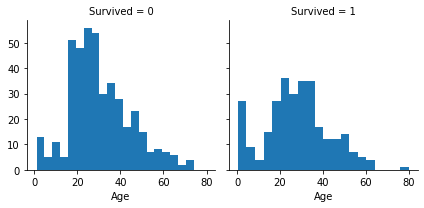

In [281]:
# Let's look at the Age distribution between survived and not survived
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [282]:
df.groupby(['Survived'])['Age'].mean()


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

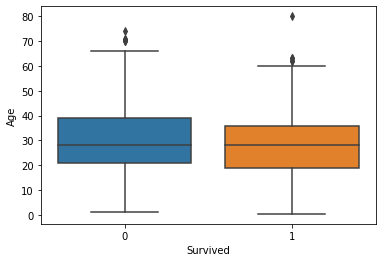

In [283]:
sns.boxplot(data=df, x='Survived', y='Age')
# This plot suggests that the median age is about the same.
  # However, the people who died tend to be older than the people who survived.

In [284]:
# Let's group the Fare in different categories
df.loc[ df['Fare'] <= 10, 'Fare']                           = 0
df.loc[(df['Fare'] > 10) & (df['Fare'] <= 20), 'Fare']      = 1
df.loc[(df['Fare'] > 20) & (df['Fare'] <= 30), 'Fare']      = 2
df.loc[ df['Fare'] > 30, 'Fare']                            = 3

df2 = df[['Survived', 'Fare']]
df2.groupby(['Fare'])['Survived'].agg(['mean', 'count'])

# This result shows that there is a positive relationship between Fare groups and Survival Rate.
  # Higher the Fare, higher the survival rate

,mean,count
Fare,,
0.0,0.199405,336
1.0,0.424581,179
2.0,0.443662,142
3.0,0.581197,234


In [285]:
df[['Survived', 'Embarked']].groupby(['Embarked']).agg(['mean', 'count'])
# This result shows that most people got on-board from Southampton, and somehow the people who got on from Cherbourg have the highest survival rate. 

Survived      
              mean count
Embarked                
C         0.553571   168
Q         0.389610    77
S         0.336957   644

In [286]:
# =====================
# Let's look at the Name to see if the person has a special title or higher status resulted in higher survival rate
# df = df[['Survived', 'Name']]

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

df['Title'] = df['Name'].apply(get_title)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Companion,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.0,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3.0,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.0,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.0,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.0,NaN,S,0,Mr


In [0]:
# df = df[['Survived', 'Title']]

df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [288]:
df5.groupby(['Title'])['Survived'].agg(['mean', 'count'], result_type='expand').sort_values(by='mean', ascending=False)

# Again, the ladies have a much higher survival rate, followed by Master, and people with rare titles. 
  # The average men (Mr) are the majority of the group (517 people), and have the lowest survival rate.

,mean,count
Title,,
Mrs,0.793651,126
Miss,0.702703,185
Master,0.575000,40
Rare,0.347826,23
Mr,0.156673,517


In [0]:
# label the gender to a number
df['Sex'] = df['Sex'].replace('female', 0)
df['Sex'] = df['Sex'].replace('male', 1)

In [294]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Companion,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0.0,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,3.0,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0.0,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.0,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0.0,NaN,S,0,Mr


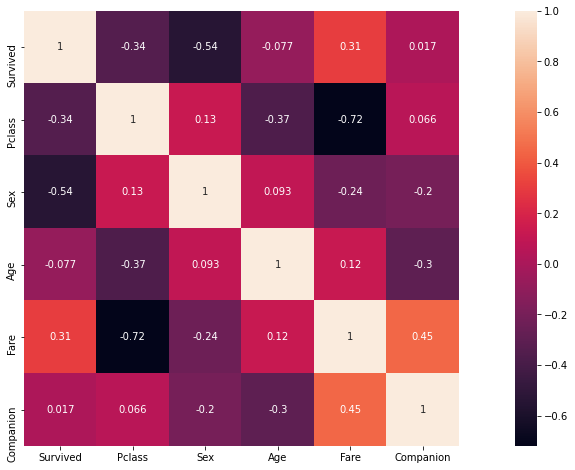

In [296]:
# Let's plot a heatmap to see if there is any straight forward linear relationships

plt.figure(figsize=(20,8))

f = (
	df.loc[:, ['Survived','Pclass','Sex','Age','Fare','Companion','Title']]
	# .dropna()
).corr()
sns.heatmap(f, annot=True, robust=True, square=True)

# As expected: 
  # Against the Survival rate
    # Pclass has a negative relationship, meaning lower the Pclass number (higher class), higher the survival rate
    # Sex has a negative relationship, meaning the females (with label: 0) has a higher survival rate
    # Fare has a positive relationship 
    # Although the Age and the Companion do not show a strong relationship in the heatmap, it does not mean there is not relationship.
      # As discussed above, the relationship with survival rate of these two seems to be non-linear, 
      # as the people in the middle (not too young or too old, medium size family) have a higher survival rate.